In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report,roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.feature_extraction.text import TfidfVectorizer

In [189]:
crawl = pd.read_csv('D:/Analisis Sentimen/Data/Crawling/crawl_jurnal.csv', index_col=0)
len(crawl)

1607

In [225]:
df = pd.read_csv('D:/Analisis Sentimen/Data/Preprocessing/prep_jurnal.csv', index_col=0)
df = df.dropna()
df.head()


,name,duration,rating,review,sentimen
0,Stephanie Zhang,3 months ago,5 stars,kraton takjub unjung kraton februari ingat hin...,1
1,Y M,9 months ago,5 stars,rasa tempat salah satu tempat paling kunjung d...,1
2,C R,6 months ago,5 stars,datang sini hari minggu banyak orang sana nikm...,1
3,Peony Ang,2 months ago,5 stars,kraton budaya luar biasa tampil tempat bagus r...,1
4,Maulana Ahsan Fahmi,11 months ago,5 stars,kraton bagi jadi area tutup buka umum area buk...,0


In [226]:
df[1184:1186]

,name,duration,rating,review,sentimen
1184,Murdi Sudarti,5 years ago,1 star,jenis tidak struktur eksponasinya perlu perhat...,0
1185,ali StenLy,3 years ago,1 star,layak kunjung lama menit beberapa arsitektur b...,0


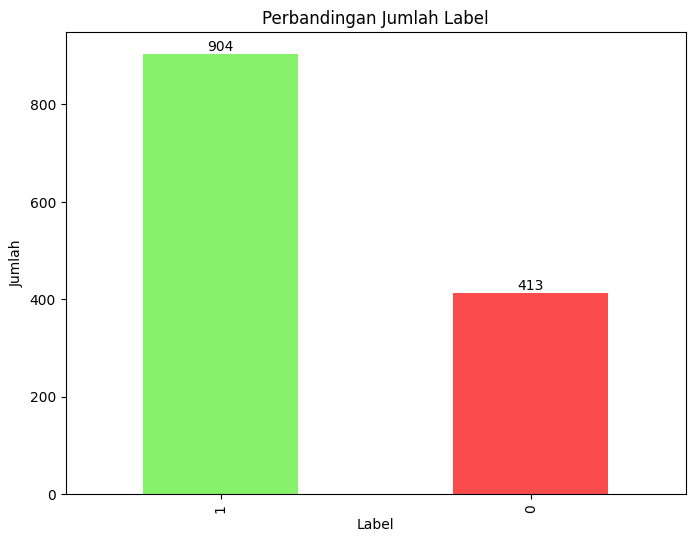

In [193]:
label_counts = df['sentimen'].value_counts()
fig, ax = plt.subplots()
fig.set_figheight(6)  # Mengatur tinggi gambar menjadi 6 inci
fig.set_figwidth(8)  # Mengatur lebar gambar menjadi 8 inci
label_counts.plot(kind='bar', ax=ax, color=['#86F16A', '#FA4C4C'])
ax.set_xlabel('Label')
ax.set_ylabel('Jumlah')
ax.set_title('Perbandingan Jumlah Label')

# Menambahkan nilai aktual pada setiap batang
for i, count in enumerate(label_counts):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')
plt.show()

In [227]:
tfidf_vectorizer = TfidfVectorizer()
X_vec = tfidf_vectorizer.fit_transform(df['review'])
tfidf_values = X_vec.toarray()
data = pd.DataFrame(data=tfidf_values, columns=tfidf_vectorizer.get_feature_names_out())
data['sentimen'] = df['sentimen']
data = data.dropna()
data.head()

,abad,abadi,abai,abal,abd,abdi,abis,acara,ad,ada,...,yogakarta,yogja,yogjakarta,yogya,yogyakarta,yogyakartadiningrat,yogyalarta,yoyakarta,zaman,sentimen
0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.120158,0.0,0.0,0.0,0.000000,1
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.045559,0.0,0.0,0.0,0.000000,1
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1
4,0.0,0.0,0.0,0.0,0.0,0.18064,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.227284,0


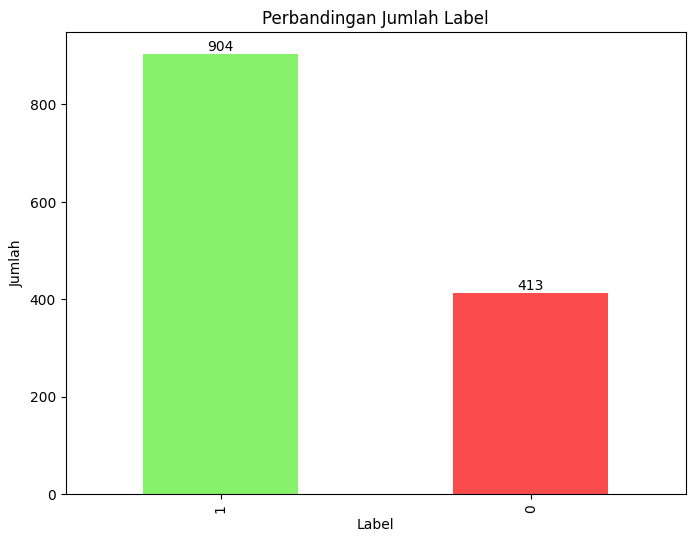

In [228]:
label_counts = data['sentimen'].value_counts()
fig, ax = plt.subplots()
fig.set_figheight(6)  # Mengatur tinggi gambar menjadi 6 inci
fig.set_figwidth(8)  # Mengatur lebar gambar menjadi 8 inci
label_counts.plot(kind='bar', ax=ax, color=['#86F16A', '#FA4C4C'])
ax.set_xlabel('Label')
ax.set_ylabel('Jumlah')
ax.set_title('Perbandingan Jumlah Label')

# Menambahkan nilai aktual pada setiap batang
for i, count in enumerate(label_counts):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')
plt.show()

In [229]:
X = data.drop(columns=['sentimen'])
y = data['sentimen']

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1185, 1827), (132, 1827), (1185,), (132,))

87.26 70.45 88.24 65.93 75.47


Text(0.5, 1.0, 'Confusion Matrix "Naive Bayes"')

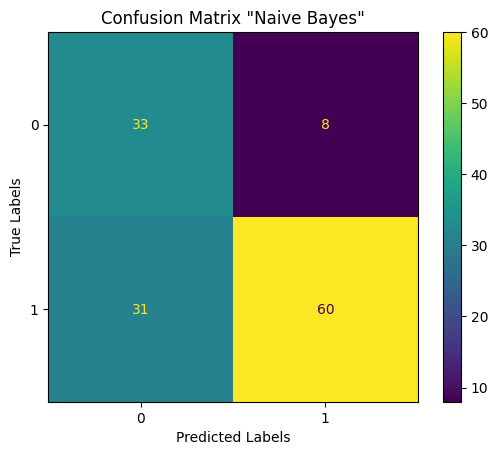

In [348]:
nb = GaussianNB()
model_nb = nb.fit(X_train, y_train)
pred_nb = model_nb.predict(X_test)

train_score = round(model_nb.score(X_train, y_train)*100,2)
accuracy = round(model_nb.score(X_test, y_test)*100, 2)
precision = round(precision_score(y_test, pred_nb)*100, 2)
recall = round(recall_score(y_test, pred_nb)*100, 2)
f1 = round(f1_score(y_test, pred_nb)*100, 2)

print(train_score,accuracy,precision,recall,f1)
cm = confusion_matrix(y_test, pred_nb)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix "Naive Bayes"')


77.38


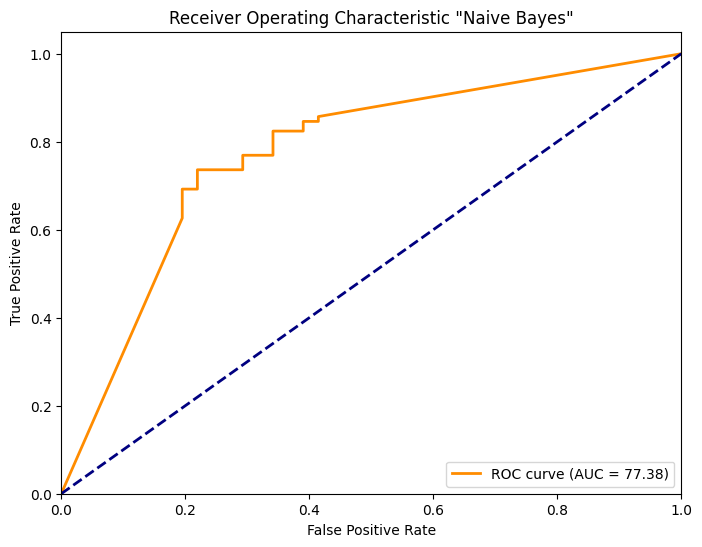

In [349]:
prob_nb = model_nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, prob_nb)

roc_auc = round(auc(fpr, tpr)*100,2)
print(roc_auc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic "Naive Bayes"')
plt.legend(loc='lower right')
plt.show()

In [350]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.52      0.80      0.63        41
           1       0.88      0.66      0.75        91

    accuracy                           0.70       132
   macro avg       0.70      0.73      0.69       132
weighted avg       0.77      0.70      0.72       132



90.55 85.61 85.29 95.6 90.16


Text(0.5, 1.0, 'Confusion Matrix "Logistic Regression"')

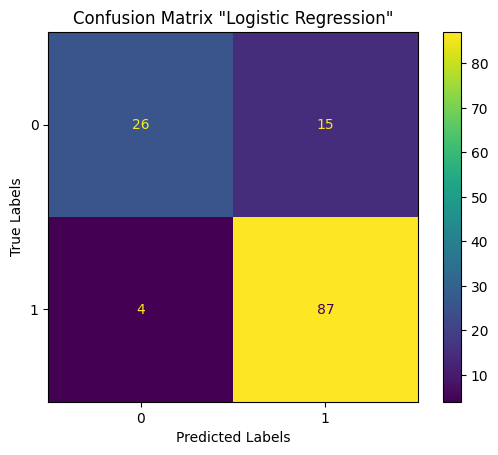

In [351]:
lr = LogisticRegression()
model_lr = lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

train_score = round(model_lr.score(X_train, y_train)*100,2)
accuracy = round(model_lr.score(X_test, y_test)*100, 2)
precision = round(precision_score(y_test, pred_lr)*100, 2)
recall = round(recall_score(y_test, pred_lr)*100, 2)
f1 = round(f1_score(y_test, pred_lr)*100, 2)


print(train_score,accuracy,precision,recall,f1)
cm = confusion_matrix(y_test, pred_lr)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix "Logistic Regression"')

90.99


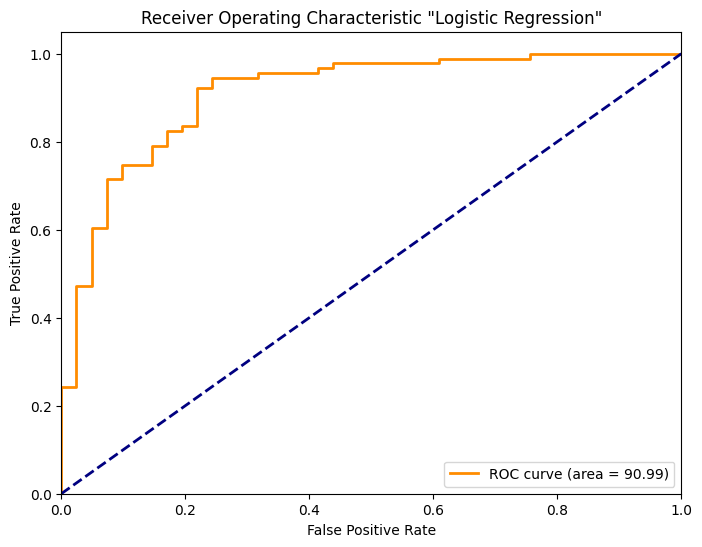

In [352]:
prob_lr = model_lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, prob_lr)

roc_auc = round(auc(fpr, tpr)*100,2)
print(roc_auc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic "Logistic Regression"')
plt.legend(loc='lower right')
plt.show()

In [337]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.63      0.73        41
           1       0.85      0.96      0.90        91

    accuracy                           0.86       132
   macro avg       0.86      0.80      0.82       132
weighted avg       0.86      0.86      0.85       132



95.36 87.12 88.54 93.41 90.91


Text(0.5, 1.0, 'Confusion Matrix "SVM"')

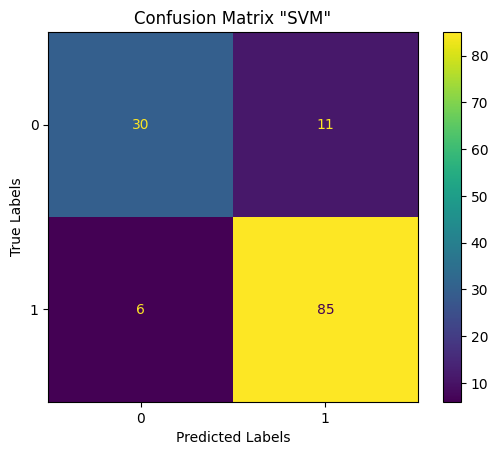

In [344]:
svm = SVC(probability=True, kernel='linear')
model_svm = svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_test,)

train_score = round(model_svm.score(X_train, y_train)*100,2)
accuracy = round(model_svm.score(X_test, y_test)*100, 2)
precision = round(precision_score(y_test, pred_svm)*100, 2)
recall = round(recall_score(y_test, pred_svm)*100, 2)
f1 = round(f1_score(y_test, pred_svm)*100, 2)

print(train_score,accuracy,precision,recall,f1)
cm = confusion_matrix(y_test, pred_svm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix "SVM"')

91.48


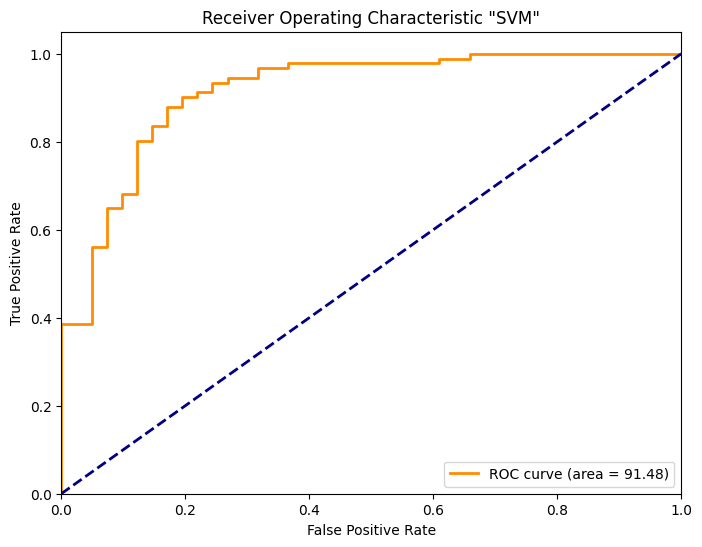

In [345]:
prob_svm = model_svm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, prob_svm)

roc_auc = round(auc(fpr, tpr)*100,2)

print(roc_auc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic "SVM"')
plt.legend(loc='lower right')
plt.show()

In [330]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75       124
           1       0.87      0.93      0.90       272

    accuracy                           0.86       396
   macro avg       0.85      0.81      0.82       396
weighted avg       0.85      0.86      0.85       396



## TEST

In [206]:
import re
import pandas as pd
from nltk import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
#from translate import Translator
#from googletrans import Translator
from mtranslate import translate

def translate_text(text):
    translation = translate(text, "id")
    return translation

def clean(text):
    text = text.strip()
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]+', ' ', text)
    return text

def normalisasi(text):
    norm= {' beenilai ':' bernilai ', ' gak ':' tidak ', ' eksis ': ' ada ', ' yg ':' yang ', ' sdg ':' sedang ', ' dg ':' dengan ', ' nan ':' dan ',
        ' cociks ':' cocok ', ' heritage ': ' peninggalan ', ' trip ':' wisata ',' kl ':' kalo ', ' ga ':' tidak ', ' bosen ': ' bosan ',
        ' d ':' di ', ' k ':' ke ', ' plg ':' pulang ', ' ajah ':' aja ', ' bgt ':' banget ', ' fahami ':' pahami ', ' cermay ':' cermat ',
        'tmptna ':'tempatnya ', ' dpt ':' dapat ', ' kebudyaan ':' kebudayaan ', ' guide ':' pemandu ', ' dilaranf ':' dilarang ', ' lbh ':' lebih ',
        ' ayem ':' tenang ', ' dah ':' udah ', ' mager ': ' malas gerak ', ' bikin ':' buat ', ' dsana ':' disana ', ' dijaman ':' di zaman',
        ' kalo ':' kalau ', ' hape ':' gawai ', ' charge ':' biaya ', ' adem ':' tenang ', 'nguri uri ':'melestarikan ', ' lg ':' lagi ', ' ny ':' nya ',
        ' sejrh ':' sejarah ', ' thn ':' tahun ', ' utk ':' untuk ', ' mlht ':' melihat ', ' dn ':' dan ', ' gk ':' tidak ', ' klw ':' kalo ', ' trs ':' terus ',
        ' bs ': ' bisa ', ' jlan ':' jalan ', ' temp ':' tempat ', ' sy ':' saya ', ' trmpatnya ':' tempatnya ', 'srklsi ':'sekali ', ' mantafff ':' mantap ',
        ' karna ':' karena ', ' exis ':' tetap ', 'apek tenan':'bagus banget', ' tentram ':' tenteram', ' mgkn ':' mungkin ', ' sndri ':' sendiri ',
        ' boring ':' bosan ', ' lmyn ':' lumayan', ' krn ':' karena  ', ' pgn ':' pengen ', ' dlm ':' dalam ', ' bt ':' butuh ', ' dr ':' dari ',
        ' n ':' dan ', ' bbrp ':' beberapa ', ' skali ':' sekali ', ' bangeettt':' banget', 'snagt ':'sangat ', ' poto':' foto', ' photo ':' foto ',
        ' skr ':' sekarang ', ' hrs ':' harus ', ' sgt ':' sangat ', ' biasaaaaaaa':' biasa', ' jg':' juga', ' lwt ':' lewat ', ' orng ':' orang ',
        ' dlm ':' dalam ', ' apakh ':' apakah ', ' mnitip ':' menitip ', ' ttip ':' titip ', ' bsa ':' bisa ', ' tkg ':' tukang ', ' kmi ':' kami ',
        ' dibw ':' dibawa ', ' jdwl ':' jadwal ', ' bkrja ':' berkerja', ' bln  ':' bulan ', ' pnggntinya ': ' penggantinya ', ' semberawut ':' berantakan ',
        ' ptgs ': ' petugas ', ' rmptnya ':' rumputnya', ' petgsnya ':' petugasnya', ' jd ': ' jd ', ' kasultanan ':' kesultanan', 'mmf ': 'mohon maaf ',
        ' blm ':' belum ', ' ttp ':' tetapi ', ' sprti ':' seperti ', ' dtg ':' datang ', ' clana ':' celana ', ' luarbiasa ':' luar biasa', ' kbdynnya ':' kebudayaan ',
        ' prl ':' perlu ', ' dtngktkn ':' ditingkatkan lagi ', ' tlah ':' telah ', ' jm ':' jam ', 'jum at':'jumat', ' bnyak ':' banyak ', ' bgs ':' bagus ',
        ' tdk ':' tidak ', ' exis ':' ada ', ' rapih ':' rapi ', ' tp ':' tapi ', ' pas ':' waktu ', 'diterjemahkan oleh google ':'', 'smoga ':'semoga ', ' ank ':' anak ',
        'istana':'kraton', 'keraton':'kraton', 'ngayogyakarta':'yogyakarta', 'jogja ':'yogyakarta ', ' jogjakarta':' yogyakarta',
        ' rp ': ' rupiah ', ' rb ':' ribu ', ' b ':' biasa ', ' ngayogjokarto ':' yogyakarta ', ' th ': ' tahun '}
    for i in norm:
        text = text.replace(i, norm[i])
    return text
    
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

def stopword(tokens):
    factory = StopWordRemoverFactory()
    stopwords = factory.get_stop_words()
    filtered_tokens = [token for token in tokens if token not in stopwords]
    return filtered_tokens

def stemming(filtered_tokens):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()  
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return stemmed_tokens

def join(stemmed_tokens):
    joined_text = ' '.join(stemmed_tokens)
    return joined_text

def label(rating):
    if rating == '5 stars' or rating == '4 stars':
        return '1'
    else:
        return '0'

def fix_label(df):
    kata_positif = ['bersih', 'murah', 'rapi', 'atur', 'puas', 'ramah', 'bagus', 'awat', 'oke', 'keren', 'kagum']
    df.loc[df['review'].str.contains('|'.join(kata_positif), case=False), 'sentimen'] = 1   
    kata_negatif = ['bau', 'kotor', 'mahal', 'panas', 'jelek', 'macet', 'ramai', 'kasar', 'tutup', 'lama']
    df.loc[df['review'].str.contains('|'.join(kata_negatif), case=False), 'sentimen'] = 0
    df = df[df['review'].apply(lambda x: len(x.split()) > 2)]
    df.reset_index(drop=True, inplace=True)
    return df

def prep_all(text):
    text = clean(text)
    text = normalisasi(text)
    text = tokenize(text)
    text = stopword(text)
    text = stemming(text)
    text = join(text)
 
    return pd.DataFrame({'review': [text]})

def prep_aspek(text):
    text = clean(text)
    text = normalisasi(text)
    text = tokenize(text)
    text = stopword(text)
    text = stemming(text)
    text = join(text)
    return text

In [210]:
test = prep_all("Tidak banyak yang bisa dilihat di sini. Petugas tiket itu sangat kasar kepada saya.",)
test

,review
0,banyak lihat sini tugas tiket sangat kasar


In [213]:
text = ["tinggal agung raja jawa hingga","tempat indah pandu bagus","sedikit bosan tua", "tidak banyak lihat sini tugas tiket sangat kasar", "suasana panas ramai tidak aman"]
#test = prep_all(text[0])
test_vec = tfidf_vectorizer.transform(text).toarray()

In [214]:
model_nb.predict(test_vec), model_lr.predict(test_vec),model_svm.predict(test_vec)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


(array([1, 1, 0, 0, 0], dtype=int64),
 array([1, 1, 0, 0, 0], dtype=int64),
 array([1, 1, 0, 0, 0], dtype=int64))